In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
import os
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
np.random.seed(1)
tf.compat.v1.disable_v2_behavior() 
sns.set_theme(style="whitegrid")
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import shap
import warnings
import time



In [11]:
#seoul_pow
#pusan_pow
#jeju_pow
#kor_dust -> 종로
#kangil_dust
#kangdong_dust
#incheon_dust


DATA_NAME = 'seoul_0330'
MODEL_NAME = str(int(time.time()))
CLASSFICATION_EPOCH = 200
EPOCH = 200
FULLYCON = False
OTHER_FLAG = True


dataset = read_csv('./data/'+DATA_NAME+'.csv')
dataset['Hour'] = dataset['YMDH']%100
dataset=dataset[:365*24]
dataset_day = read_csv('./data/'+DATA_NAME+'_day.csv')
dataset_day['Hour'] = dataset_day['YMDH']%100
dataset_day=dataset_day[:365]
print('Data Cols / ',dataset.columns)

Data Cols /  Index(['Unnamed: 0', 'year', 'season', 'month', 'fullday', 'YMDH',
       'Precipitation', 'Wind speed', 'Humidity', 'Solar radiation',
       'Ground temperature', 'Cloud', 'pow', 'Hour'],
      dtype='object')


In [12]:
#일조 일사 해면기압 습도 지면온도
dataset['Hour']

0        1
1        2
2        3
3        4
4        5
        ..
8755    20
8756    21
8757    22
8758    23
8759     0
Name: Hour, Length: 8760, dtype: int64

In [13]:
Features = ['pow','Wind speed', 'Humidity','Solar radiation','Ground temperature','YMDH']
Target = 'pow'

               pow   Wind speed     Humidity  Solar radiation  \
count  8760.000000  8760.000000  8760.000000      8760.000000   
mean      1.399322     2.656952    62.796244         0.492443   
std       2.100388     1.426504    20.361059         0.747736   
min       0.000000     0.000000     0.000000         0.000000   
0%        0.000000     0.000000     0.000000         0.000000   
5%        0.000000     0.600000    29.000000         0.000000   
10%       0.000000     0.900000    35.000000         0.000000   
15%       0.000000     1.200000    39.000000         0.000000   
20%       0.000000     1.400000    44.000000         0.000000   
25%       0.000000     1.600000    48.000000         0.000000   
30%       0.000000     1.800000    51.000000         0.000000   
35%       0.000000     2.000000    54.000000         0.000000   
40%       0.000000     2.200000    57.000000         0.000000   
45%       0.000000     2.300000    60.000000         0.000000   
50%       0.013871     2.

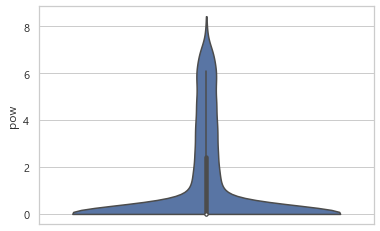

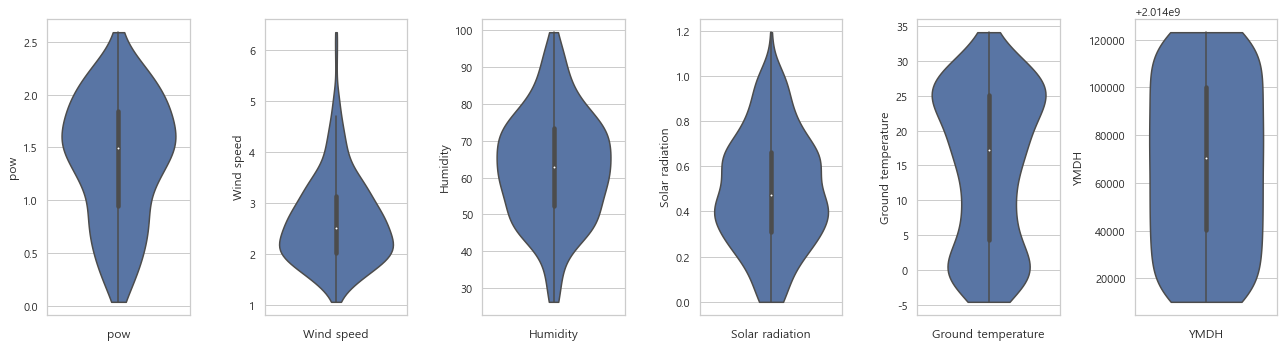

,YMDH_FILTER,fullday,pow,Wind speed,Humidity,Solar radiation,Ground temperature,YMDH
YMDH_FILTER,1.000000,1.000000,-0.023872,-0.063530,0.151710,-0.041933,0.143679,1.000000
fullday,1.000000,1.000000,-0.023902,-0.063578,0.151762,-0.041962,0.143651,1.000000
pow,-0.023872,-0.023902,1.000000,0.266494,-0.506506,0.949811,0.486955,-0.023872
Wind speed,-0.063530,-0.063578,0.266494,1.000000,-0.212577,0.262698,0.109783,-0.063530
Humidity,0.151710,0.151762,-0.506506,-0.212577,1.000000,-0.475286,0.079072,0.151710
Solar radiation,-0.041933,-0.041962,0.949811,0.262698,-0.475286,1.000000,0.528875,-0.041933
Ground temperature,0.143679,0.143651,0.486955,0.109783,0.079072,0.528875,1.000000,0.143679
YMDH,1.000000,1.000000,-0.023872,-0.063530,0.151710,-0.041933,0.143679,1.000000


In [19]:


#Features = ['SO2', 'CO', 'O3','NO2', 'PM10', 'PM25']
#Target = 'PM25'

    
#Features.append('fullday')
#Features.append('YMDH')

print(dataset[Features].describe(percentiles=[ 0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95,1 ]))

DF=dataset


TEST=DF[Features]
TEST_DAY = dataset_day[Features]

Target_LIST = DF[Target].to_list()
Fullday_LIST = DF['fullday'].to_list()
YMDH_LIST = DF['YMDH'].to_list()


TEST.insert(loc=0, column='fullday', value=Fullday_LIST)
TEST.insert(loc=0, column='YMDH_FILTER', value=YMDH_LIST)

sns.violinplot(y=DF[Target],cut=0)


'''
SCALED_Y = DF[[Target]].values.astype(float)
Y_min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
Target_LIST = Y_min_max_scaler.fit_transform(Target_LIST)
Target_LIST = list(Target_LIST)
'''


fig = plt.figure(figsize=(3*len(Features),5))
gs = fig.add_gridspec(1, len(Features))

for i in range(len(Features)):
    ax = fig.add_subplot(gs[0, i])
    sns.violinplot(y=TEST_DAY[Features[i]],cut=0)
    ax.set_xlabel(Features[i])

fig.tight_layout()
plt.show()

TEST.corr()

In [20]:


#['전력거래량','풍속(m/s)', '습도(%)','일사(MJ/m2)','지면온도(°C)','일조(hr)', '해면기압(hPa)']
#이하, 초과 [MAX, MIN]

#    '0': {
#        '기온(°C)': [[1.00, .75]],'강수량(mm)': [[1.00, .75]]
#    }, 
#['SO2', 'CO', 'O3','NO2', 'PM10', 'PM25']
'''
FeaturesRange = {
    '0': {
        'PM10': [[1.00, 0.25]]
    }, 
    '1': {
        'PM10': [[0.25, 0.20]]
    } 
}

FeaturesRange = {
    '0': {
        'Wind speed': [[1.0, 0.90]]
    },
    '1': {
        'Humidity': [[1.0, 0.7]]
    },
    '2': {
        'Ground temperature': [[0.5, 0.25]]
    },
    '3': {
        'Ground temperature': [[0.25, -0.01]]
    }
}
FeaturesRange = {
    '0': {
        'Solar radiation': [[1.0, 0.50]]
    },
    '1': {
        'Solar radiation': [[0.50, -0.1]]
    }
}
'''
FeaturesRange = {
    '0': {
        'Wind speed': [[1.0, 0.8]]
    },
    '1': {
        'Humidity': [[1.0, 0.75]]
    },
    '2': {
        'Ground temperature': [[1.0, 0.85]]
    }
}


In [21]:

def GetSubSets(_DF,_dataset_day,FeaturesRange):
    
    full_df = _DF
    full_df['Group'] = 'Other'

    day_df = _dataset_day
    LAST_DAY = full_df[-2:-1]
    LAST_DAY = int(LAST_DAY['fullday'])
    CAP_DAY =[]
    print(LAST_DAY)
    

    #print(FeaturesRange)
    #{'0': {'temprt': [[80, 70]], 'rain': [[90, 78.2]], 'wnd_spd': [[100, 90]], 'humdt': [[80, 70]], 'cloud': [[100, 90]]}, '1': {'rain': [[100, 90]]}, '2': {'temprt': [[90, 80]], 'humdt': [[90, 80]]}, '3': {'temprt': [[100, 90]], 'humdt': [[100, 90]]}}
    #del FeaturesRange['0']
    
    res_GDF = []
    GroupDF = {}
    for Groups in FeaturesRange:
        TMP = FeaturesRange[Groups]
        GroupDF[Groups] = day_df
        for Feature in TMP:
            Filters = TMP[Feature]
            F_MAX = day_df[Feature].max()
            F_MIN = day_df[Feature].min()
            ABSRange = abs(F_MIN-F_MAX)
            for MAX,MIN in Filters:
                MAX=ABSRange*MAX
                MIN=ABSRange*MIN
                MAX = MAX+F_MIN
                MIN = MIN+F_MIN
                GroupDF[Groups] = GroupDF[Groups].loc[(GroupDF[Groups][Feature] > MIN) & (GroupDF[Groups][Feature] <= MAX)]

    for Groups in GroupDF:
        list_of_day = GroupDF[Groups]['fullday'].tolist()
        TMP_DATAFRAME = pd.DataFrame()
        CAP_DAY+=list_of_day
        if LAST_DAY in list_of_day:
            list_of_day.remove(LAST_DAY)
        
        for i in list_of_day:
            tmp_ST = full_df.loc[full_df['fullday']==i].index[0]
            TMP_DF = pd.DataFrame(full_df[tmp_ST:tmp_ST+24])
            TMP_DF.reset_index(inplace=True, drop=True)
            TMP_DF.insert(loc=0, column='TARGET', value=Target_LIST[tmp_ST+24:tmp_ST+48])
            
            TMP_DATAFRAME = pd.concat([TMP_DATAFRAME,TMP_DF],ignore_index=True)
            
        TMP_DATAFRAME['Group'] = Groups
        print(TMP_DATAFRAME.size)
        TMP_DATAFRAME.sort_values("YMDH_FILTER", ascending=True)
        res_GDF.append(TMP_DATAFRAME)
        
    full_df = full_df.shift(24)
    full_df.insert(loc=0, column='TARGET', value=Target_LIST)
    
    full_df = full_df.drop(full_df.loc[full_df['fullday'].isin(CAP_DAY)].index, errors='ignore')
    
    full_df=full_df.dropna(axis=0)

    full_df = full_df.sort_values("YMDH_FILTER", ascending=True)
    full_df.reset_index(inplace=True, drop=True)
    full_df['fullday'] = full_df['fullday'].astype(int)
    if not full_df.empty:
        res_GDF.append(full_df)
    else:
        print('OTHER_FLAG')
        OTHER_FLAG=False
    return res_GDF


In [22]:
RES_TEST = GetSubSets(TEST,dataset_day,FeaturesRange)
for Q in RES_TEST:
    print(Q.groupby('Group').count())


if len(RES_TEST)==len(FeaturesRange):
    OTHER_FLAG = False 

print(OTHER_FLAG)

#Features.remove('fullday')
#Features.remove('YMDH')


20141231
480
9360
6960
       TARGET  YMDH_FILTER  fullday  pow  Wind speed  Humidity  \
Group                                                            
0          48           48       48   48          48        48   

       Solar radiation  Ground temperature  YMDH  
Group                                             
0                   48                  48    48  
       TARGET  YMDH_FILTER  fullday  pow  Wind speed  Humidity  \
Group                                                            
1         936          936      936  936         936       936   

       Solar radiation  Ground temperature  YMDH  
Group                                             
1                  936                 936   936  
       TARGET  YMDH_FILTER  fullday  pow  Wind speed  Humidity  \
Group                                                            
2         696          696      696  696         696       696   

       Solar radiation  Ground temperature  YMDH  
Group                  


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:

#'MINMAX'
#'STD'
#'YEO'
# ''
SCALE_FUNC = 'MINMAX'

def SCALE_FUCTIONS(_DF):
    TMP_TARGET = _DF['TARGET'].to_list()
    
    _DF=_DF[Features]
    if SCALE_FUNC == 'MINMAX':
        _DF = MINMAX_scaler.transform(_DF)
    elif SCALE_FUNC == 'STD':
        _DF = STD_scaler.transform(_DF.values)
    elif SCALE_FUNC == 'YEO':
        _DF = YEO_scaler.transform(_DF)
    else:
        _DF = _DF
    
    _DF = pd.DataFrame(_DF,columns=Features)
    _DF.insert(loc=0, column='TARGET', value=TMP_TARGET)
    return _DF
    
MINMAX_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
STD_scaler = preprocessing.StandardScaler()
YEO_scaler = preprocessing.PowerTransformer(method='yeo-johnson')

Y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

TEST = DF[Features]
MINMAX_scaler.fit(TEST)
STD_scaler.fit(TEST)
YEO_scaler.fit(TEST)

Y_scaler.fit(np.array(Target_LIST).reshape(-1,1))

ALL_X=DF[Features]
print(ALL_X)
ALL_X = ALL_X.shift(24)
ALL_X.insert(loc=0, column='TARGET', value=Target_LIST)
ALL_X=ALL_X.dropna(axis=0)
ALL_X.reset_index(inplace=True, drop=True)
ALL_X = SCALE_FUCTIONS(ALL_X)


for i in range(len(RES_TEST)):
    RES_TEST[i] = SCALE_FUCTIONS(RES_TEST[i])
    

      pow  Wind speed  Humidity  Solar radiation  Ground temperature  \
0     0.0         2.3      66.0              0.0                -0.1   
1     0.0         1.7      67.0              0.0                -0.3   
2     0.0         1.4      60.0              0.0                -0.4   
3     0.0         2.8      59.0              0.0                -0.6   
4     0.0         2.0      56.0              0.0                -0.7   
...   ...         ...       ...              ...                 ...   
8755  0.0         5.6      46.0              0.0                -0.7   
8756  0.0         4.0      46.0              0.0                -1.2   
8757  0.0         7.9      39.0              0.0                -1.9   
8758  0.0         7.1      31.0              0.0                -3.1   
8759  0.0         2.1      64.0              0.0                -0.3   

            YMDH  
0     2014010101  
1     2014010102  
2     2014010103  
3     2014010104  
4     2014010105  
...          ...  
87

divide by zero encountered in log


In [24]:
G_TRAIN_X = []
G_TRAIN_y = []

G_TEST_X = []
G_TEST_y = []

G_DISPLAY_Y = []
G_DISPLAY_TEST_Y = []
MIN_Y=float("inf")
MAX_Y=-1
for G in RES_TEST:
    values = G.values
    Xdata = values[:, 1:]
    Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,len(Features)))
    
    G_TRAIN_X.append(Xdata[:int(Xdata.shape[0]*0.8)])
    G_TEST_X.append(Xdata[int(Xdata.shape[0]*0.8):])
    
    Ydata = values[:, 0]
    Ydata = Ydata.reshape((int(len(Ydata)/24),24))
    
    Ydata = Ydata.sum(axis=1)
    Ydata = list(Ydata.reshape((Ydata.shape[0],)))
    if MIN_Y>min(Ydata):
        MIN_Y = min(Ydata)
    if MAX_Y<max(Ydata):
        MAX_Y = max(Ydata)
    
    G_DISPLAY_Y = G_DISPLAY_Y+Ydata[:int(len(Ydata)*0.8)]
    G_DISPLAY_TEST_Y= G_DISPLAY_TEST_Y + Ydata[int(len(Ydata)*0.8):]
    
    if FULLYCON:
        Ydata = Ydataa.reshape((Ydata.shape[0],Ydata.shape[1],1))

    G_TRAIN_y.append(Ydata[:int(len(Ydata)*0.8)])
    G_TEST_y.append(Ydata[int(len(Ydata)*0.8):])



CLASSIFI_X = G_TRAIN_X[0]
CLASSIFI_y = [0 for _ in range(G_TRAIN_X[0].shape[0])]

CLASSIFI_TEST_X = G_TEST_X[0]
CLASSIFI_TEST_y = [0 for _ in range(G_TEST_X[0].shape[0])]

for G in range(1,len(RES_TEST)):
    CLASSIFI_X = np.concatenate((CLASSIFI_X, G_TRAIN_X[G]), axis=0)
    CLASSIFI_y = CLASSIFI_y + [G for _ in range(G_TRAIN_X[G].shape[0])]
    
    CLASSIFI_TEST_X = np.concatenate((CLASSIFI_TEST_X, G_TEST_X[G]), axis=0)
    CLASSIFI_TEST_y = CLASSIFI_TEST_y + [G for _ in range(G_TEST_X[G].shape[0])]

CLASSIFI_X = CLASSIFI_X.reshape((CLASSIFI_X.shape[0],CLASSIFI_X.shape[1]*CLASSIFI_X.shape[2]))
CLASSIFI_TEST_X = CLASSIFI_TEST_X.reshape((CLASSIFI_TEST_X.shape[0],CLASSIFI_TEST_X.shape[1]*CLASSIFI_TEST_X.shape[2]))

CLASSIFI_y = np.array(CLASSIFI_y)
CLASSIFI_y_Dis = CLASSIFI_y
CLASSIFI_y = pd.get_dummies(CLASSIFI_y)

CLASSIFI_TEST_y
CLASSIFI_TEST_y = np.array(CLASSIFI_TEST_y)
CLASSIFI_TEST_y_Dis = CLASSIFI_TEST_y
CLASSIFI_TEST_y = pd.get_dummies(CLASSIFI_TEST_y)

for i in range(len(G_TRAIN_y)):
    G_TRAIN_y[i] = list(Y_scaler.transform(np.array(G_TRAIN_y[i]).reshape(-1,1)).flatten())


In [25]:

values = ALL_X.values
Xdata = values[:, 1:]
Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,len(Features)))
    
ALL_TRAIN_X=Xdata[:int(Xdata.shape[0]*0.8)]
    
Ydata = values[:, 0]
Ydata = Ydata.reshape((int(len(Ydata)/24),24))
    
Ydata = Ydata.sum(axis=1)
Ydata = list(Ydata.reshape((Ydata.shape[0],)))

ALL_DISPLAY_Y = []

ALL_DISPLAY_Y = ALL_DISPLAY_Y+Ydata[:int(len(Ydata)*0.8)]
    
ALL_TRAIN_y = Ydata[:int(len(Ydata)*0.8)]

ALL_TRAIN_y = list(Y_scaler.transform(np.array(ALL_TRAIN_y).reshape(-1,1)).flatten())


In [26]:
#CLASSFICATION_PATH = MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION.h5'

import random

testlinC = []
for i in range(100):
    testlinC.append(random.randint(0, CLASSIFI_TEST_X.shape[0]-1))

enTest_X = CLASSIFI_TEST_X[testlinC, :]
enTest_y = CLASSIFI_TEST_y_Dis[testlinC]

enTest_dis_y= G_DISPLAY_TEST_Y[:]
enTest_dis_y = np.vstack(enTest_dis_y)
enTest_dis_y = enTest_dis_y[testlinC,:]

print(enTest_dis_y.shape)

print(enTest_X.shape)

(100, 1)
(100, 144)


In [30]:
MODEL_PATH ='models/'+DATA_NAME+'/'+MODEL_NAME 
os.makedirs(MODEL_PATH, exist_ok=True)

tp = pd.DataFrame( data = {'MIN_Y': [MIN_Y],'MAX_Y': [MAX_Y] } )
tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_MINMAX.csv')

weights_dict = [dict() for _ in range(len(RES_TEST))]
def TEMPFUNC(TI):
    return models[TI].predict(G_TRAIN_X[TI])

def build_model(train_X, train_y ):
    M = tf.keras.Sequential()

    if FULLYCON:
        M.add(tf.keras.layers.LSTM(200,  input_shape = (train_X.shape[1], train_X.shape[2])))
        M.add(tf.keras.layers.RepeatVector(24))
        M.add(tf.keras.layers.LSTM(200,  return_sequences=True))
        M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
        M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
    else:
        M.add(tf.keras.layers.LSTM(50,  input_shape = (train_X.shape[1], train_X.shape[2])))
        M.add(tf.keras.layers.Dense(5, activation='relu'))
        M.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam()

    M.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_logarithmic_error','mean_squared_error'])
    return M


#mean_absolute_error
EPOCH = 500
models = []
for GN in range(len(RES_TEST)):
    models.append(build_model(G_TRAIN_X[GN],G_TRAIN_y[GN]))
        # Open the file
    with open(MODEL_PATH + '/'+str(GN)+'_summary.txt','w') as fh:
        models[GN].summary(print_fn=lambda x: fh.write(x + '\n'))

ALL_MODEL = build_model(ALL_TRAIN_X,ALL_TRAIN_y)
ALL_MODEL.fit(ALL_TRAIN_X, ALL_TRAIN_y, epochs=EPOCH, verbose=1, shuffle=False)

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
        
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    os.makedirs(_path, exist_ok=True)
    weight_callback = tf.keras.callbacks.LambdaCallback( on_epoch_end=lambda epoch, logs: weights_dict[GN].update({epoch:TEMPFUNC(GN)}))
    csv_logger = tf.keras.callbacks.CSVLogger(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv', separator=',')
    
    models[GN].fit(G_TRAIN_X[GN], G_TRAIN_y[GN], epochs=EPOCH, verbose=1, shuffle=False, callbacks=[weight_callback,csv_logger] )

    BIAS_DEF = []
    VAR_DEF = []
    for T in weights_dict[GN]:
        YT = weights_dict[GN][T]
        YT_var = [np.mean(x) for x in YT]
        var = [pow(np.mean(x)-np.mean(YT_var),2) for x in YT]
        bias = []
        for Gi in range(0,len(G_TRAIN_y[GN])):
            bias.append(pow(np.mean(G_TRAIN_y[GN][Gi]) - YT[Gi],2))
        VAR_DEF.append(np.mean(var))
        BIAS_DEF.append(np.mean(bias))
    BV = pd.DataFrame( data = {'BIAS': BIAS_DEF, 'VAR': VAR_DEF} )
    
    models[GN].save(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5')
    BV.to_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv', index=False) 

Train on 291 samples
Epoch 1/500
291/291 [==============================] - 0s 144us/sample - loss: 19.7152 - mean_squared_logarithmic_error: 2.4026 - mean_squared_error: 19.7152
Epoch 2/500
291/291 [==============================] - 0s 137us/sample - loss: 16.5546 - mean_squared_logarithmic_error: 1.5984 - mean_squared_error: 16.5546
Epoch 3/500
291/291 [==============================] - 0s 141us/sample - loss: 7.3268 - mean_squared_logarithmic_error: 0.4180 - mean_squared_error: 7.3268
Epoch 4/500
291/291 [==============================] - 0s 158us/sample - loss: 2.7574 - mean_squared_logarithmic_error: 0.1562 - mean_squared_error: 2.7574
Epoch 5/500
291/291 [==============================] - 0s 137us/sample - loss: 3.0418 - mean_squared_logarithmic_error: 0.1831 - mean_squared_error: 3.0418
Epoch 6/500
291/291 [==============================] - 0s 137us/sample - loss: 2.9025 - mean_squared_logarithmic_error: 0.1711 - mean_squared_error: 2.9025
Epoch 7/500
291/291 [==================

291/291 [==============================] - 0s 144us/sample - loss: 2.4245 - mean_squared_logarithmic_error: 0.1401 - mean_squared_error: 2.4245
Epoch 54/500
291/291 [==============================] - 0s 144us/sample - loss: 2.7051 - mean_squared_logarithmic_error: 0.1562 - mean_squared_error: 2.7051
Epoch 55/500
291/291 [==============================] - 0s 147us/sample - loss: 2.5840 - mean_squared_logarithmic_error: 0.1553 - mean_squared_error: 2.5840
Epoch 56/500
291/291 [==============================] - 0s 144us/sample - loss: 2.4661 - mean_squared_logarithmic_error: 0.1467 - mean_squared_error: 2.4661
Epoch 57/500
291/291 [==============================] - 0s 141us/sample - loss: 2.4536 - mean_squared_logarithmic_error: 0.1450 - mean_squared_error: 2.4536
Epoch 58/500
291/291 [==============================] - 0s 147us/sample - loss: 2.4055 - mean_squared_logarithmic_error: 0.1428 - mean_squared_error: 2.4055
Epoch 59/500
291/291 [==============================] - 0s 147us/sample

291/291 [==============================] - 0s 141us/sample - loss: 2.1540 - mean_squared_logarithmic_error: 0.1292 - mean_squared_error: 2.1540
Epoch 106/500
291/291 [==============================] - 0s 141us/sample - loss: 2.0875 - mean_squared_logarithmic_error: 0.1212 - mean_squared_error: 2.0875
Epoch 107/500
291/291 [==============================] - 0s 147us/sample - loss: 2.0871 - mean_squared_logarithmic_error: 0.1202 - mean_squared_error: 2.0871
Epoch 108/500
291/291 [==============================] - 0s 154us/sample - loss: 2.0648 - mean_squared_logarithmic_error: 0.1222 - mean_squared_error: 2.0648
Epoch 109/500
291/291 [==============================] - 0s 144us/sample - loss: 2.0698 - mean_squared_logarithmic_error: 0.1185 - mean_squared_error: 2.0698
Epoch 110/500
291/291 [==============================] - 0s 144us/sample - loss: 2.1134 - mean_squared_logarithmic_error: 0.1243 - mean_squared_error: 2.1134
Epoch 111/500
291/291 [==============================] - 0s 141us/

291/291 [==============================] - 0s 141us/sample - loss: 2.0749 - mean_squared_logarithmic_error: 0.1241 - mean_squared_error: 2.0749
Epoch 157/500
291/291 [==============================] - 0s 147us/sample - loss: 2.0287 - mean_squared_logarithmic_error: 0.1164 - mean_squared_error: 2.0287
Epoch 158/500
291/291 [==============================] - 0s 144us/sample - loss: 2.0639 - mean_squared_logarithmic_error: 0.1197 - mean_squared_error: 2.0639
Epoch 159/500
291/291 [==============================] - 0s 144us/sample - loss: 2.0065 - mean_squared_logarithmic_error: 0.1198 - mean_squared_error: 2.0065
Epoch 160/500
291/291 [==============================] - 0s 154us/sample - loss: 2.0158 - mean_squared_logarithmic_error: 0.1119 - mean_squared_error: 2.0158
Epoch 161/500
291/291 [==============================] - 0s 144us/sample - loss: 2.0416 - mean_squared_logarithmic_error: 0.1227 - mean_squared_error: 2.0416
Epoch 162/500
291/291 [==============================] - 0s 134us/

291/291 [==============================] - 0s 147us/sample - loss: 1.9235 - mean_squared_logarithmic_error: 0.1147 - mean_squared_error: 1.9235
Epoch 208/500
291/291 [==============================] - 0s 147us/sample - loss: 1.9225 - mean_squared_logarithmic_error: 0.1090 - mean_squared_error: 1.9225
Epoch 209/500
291/291 [==============================] - 0s 141us/sample - loss: 1.9456 - mean_squared_logarithmic_error: 0.1133 - mean_squared_error: 1.9456
Epoch 210/500
291/291 [==============================] - 0s 151us/sample - loss: 1.9385 - mean_squared_logarithmic_error: 0.1139 - mean_squared_error: 1.9385
Epoch 211/500
291/291 [==============================] - 0s 144us/sample - loss: 1.9375 - mean_squared_logarithmic_error: 0.1068 - mean_squared_error: 1.9375
Epoch 212/500
291/291 [==============================] - 0s 151us/sample - loss: 1.9903 - mean_squared_logarithmic_error: 0.1187 - mean_squared_error: 1.9903
Epoch 213/500
291/291 [==============================] - 0s 147us/

291/291 [==============================] - 0s 147us/sample - loss: 1.7532 - mean_squared_logarithmic_error: 0.1006 - mean_squared_error: 1.7532
Epoch 259/500
291/291 [==============================] - 0s 147us/sample - loss: 1.7551 - mean_squared_logarithmic_error: 0.1011 - mean_squared_error: 1.7551
Epoch 260/500
291/291 [==============================] - 0s 161us/sample - loss: 1.7459 - mean_squared_logarithmic_error: 0.1000 - mean_squared_error: 1.7459
Epoch 261/500
291/291 [==============================] - 0s 158us/sample - loss: 1.7318 - mean_squared_logarithmic_error: 0.0987 - mean_squared_error: 1.7318
Epoch 262/500
291/291 [==============================] - 0s 158us/sample - loss: 1.7543 - mean_squared_logarithmic_error: 0.1016 - mean_squared_error: 1.7543
Epoch 263/500
291/291 [==============================] - 0s 147us/sample - loss: 1.7760 - mean_squared_logarithmic_error: 0.1000 - mean_squared_error: 1.7760
Epoch 264/500
291/291 [==============================] - 0s 147us/

291/291 [==============================] - 0s 147us/sample - loss: 1.6875 - mean_squared_logarithmic_error: 0.0949 - mean_squared_error: 1.6875
Epoch 310/500
291/291 [==============================] - 0s 151us/sample - loss: 1.6709 - mean_squared_logarithmic_error: 0.0980 - mean_squared_error: 1.6709
Epoch 311/500
291/291 [==============================] - 0s 144us/sample - loss: 1.6437 - mean_squared_logarithmic_error: 0.0917 - mean_squared_error: 1.6437
Epoch 312/500
291/291 [==============================] - 0s 144us/sample - loss: 1.6377 - mean_squared_logarithmic_error: 0.0937 - mean_squared_error: 1.6377
Epoch 313/500
291/291 [==============================] - 0s 144us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0929 - mean_squared_error: 1.6664
Epoch 314/500
291/291 [==============================] - 0s 147us/sample - loss: 1.6476 - mean_squared_logarithmic_error: 0.0961 - mean_squared_error: 1.6476
Epoch 315/500
291/291 [==============================] - 0s 144us/

291/291 [==============================] - 0s 154us/sample - loss: 1.6843 - mean_squared_logarithmic_error: 0.0928 - mean_squared_error: 1.6843
Epoch 361/500
291/291 [==============================] - 0s 151us/sample - loss: 1.6775 - mean_squared_logarithmic_error: 0.0967 - mean_squared_error: 1.6775
Epoch 362/500
291/291 [==============================] - 0s 137us/sample - loss: 1.6513 - mean_squared_logarithmic_error: 0.0927 - mean_squared_error: 1.6513
Epoch 363/500
291/291 [==============================] - 0s 141us/sample - loss: 1.6944 - mean_squared_logarithmic_error: 0.0911 - mean_squared_error: 1.6944
Epoch 364/500
291/291 [==============================] - 0s 141us/sample - loss: 1.5995 - mean_squared_logarithmic_error: 0.0931 - mean_squared_error: 1.5995
Epoch 365/500
291/291 [==============================] - 0s 141us/sample - loss: 1.5272 - mean_squared_logarithmic_error: 0.0840 - mean_squared_error: 1.5272
Epoch 366/500
291/291 [==============================] - 0s 144us/

291/291 [==============================] - 0s 147us/sample - loss: 1.5073 - mean_squared_logarithmic_error: 0.0861 - mean_squared_error: 1.5073
Epoch 412/500
291/291 [==============================] - 0s 147us/sample - loss: 1.3808 - mean_squared_logarithmic_error: 0.0760 - mean_squared_error: 1.3808
Epoch 413/500
291/291 [==============================] - 0s 147us/sample - loss: 1.3159 - mean_squared_logarithmic_error: 0.0772 - mean_squared_error: 1.3159
Epoch 414/500
291/291 [==============================] - 0s 147us/sample - loss: 1.4114 - mean_squared_logarithmic_error: 0.0741 - mean_squared_error: 1.4114
Epoch 415/500
291/291 [==============================] - 0s 147us/sample - loss: 1.4787 - mean_squared_logarithmic_error: 0.0864 - mean_squared_error: 1.4787
Epoch 416/500
291/291 [==============================] - 0s 151us/sample - loss: 1.3097 - mean_squared_logarithmic_error: 0.0730 - mean_squared_error: 1.3097
Epoch 417/500
291/291 [==============================] - 0s 151us/

291/291 [==============================] - 0s 144us/sample - loss: 1.1566 - mean_squared_logarithmic_error: 0.0646 - mean_squared_error: 1.1566
Epoch 463/500
291/291 [==============================] - 0s 144us/sample - loss: 1.1764 - mean_squared_logarithmic_error: 0.0662 - mean_squared_error: 1.1764
Epoch 464/500
291/291 [==============================] - 0s 144us/sample - loss: 1.1213 - mean_squared_logarithmic_error: 0.0614 - mean_squared_error: 1.1213
Epoch 465/500
291/291 [==============================] - 0s 144us/sample - loss: 1.0953 - mean_squared_logarithmic_error: 0.0614 - mean_squared_error: 1.0953
Epoch 466/500
291/291 [==============================] - 0s 147us/sample - loss: 1.1312 - mean_squared_logarithmic_error: 0.0652 - mean_squared_error: 1.1312
Epoch 467/500
291/291 [==============================] - 0s 144us/sample - loss: 1.2523 - mean_squared_logarithmic_error: 0.0682 - mean_squared_error: 1.2523
Epoch 468/500
291/291 [==============================] - 0s 144us/

1/1 [==============================] - 0s 2ms/sample - loss: 19.9066 - mean_squared_logarithmic_error: 1.4904 - mean_squared_error: 19.9066
Epoch 15/500
1/1 [==============================] - 0s 2ms/sample - loss: 18.8834 - mean_squared_logarithmic_error: 1.3467 - mean_squared_error: 18.8834
Epoch 16/500
1/1 [==============================] - 0s 3ms/sample - loss: 17.8033 - mean_squared_logarithmic_error: 1.2074 - mean_squared_error: 17.8033
Epoch 17/500
1/1 [==============================] - 0s 3ms/sample - loss: 16.6369 - mean_squared_logarithmic_error: 1.0697 - mean_squared_error: 16.6369
Epoch 18/500
1/1 [==============================] - 0s 3ms/sample - loss: 15.3601 - mean_squared_logarithmic_error: 0.9326 - mean_squared_error: 15.3601
Epoch 19/500
1/1 [==============================] - 0s 2ms/sample - loss: 13.9917 - mean_squared_logarithmic_error: 0.7996 - mean_squared_error: 13.9917
Epoch 20/500
1/1 [==============================] - 0s 3ms/sample - loss: 12.6254 - mean_square

1/1 [==============================] - 0s 2ms/sample - loss: 0.0181 - mean_squared_logarithmic_error: 4.4372e-04 - mean_squared_error: 0.0181
Epoch 68/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0121 - mean_squared_logarithmic_error: 2.9646e-04 - mean_squared_error: 0.0121
Epoch 69/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0074 - mean_squared_logarithmic_error: 1.8204e-04 - mean_squared_error: 0.0074
Epoch 70/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0040 - mean_squared_logarithmic_error: 9.8577e-05 - mean_squared_error: 0.0040
Epoch 71/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0017 - mean_squared_logarithmic_error: 4.3049e-05 - mean_squared_error: 0.0017
Epoch 72/500
1/1 [==============================] - 0s 2ms/sample - loss: 4.6944e-04 - mean_squared_logarithmic_error: 1.1682e-05 - mean_squared_error: 4.6944e-04
Epoch 73/500
1/1 [==============================] - 0s 3ms/sample - loss: 1

1/1 [==============================] - 0s 3ms/sample - loss: 1.5035e-04 - mean_squared_logarithmic_error: 3.7470e-06 - mean_squared_error: 1.5035e-04
Epoch 119/500
1/1 [==============================] - 0s 3ms/sample - loss: 1.0901e-04 - mean_squared_logarithmic_error: 2.7173e-06 - mean_squared_error: 1.0901e-04
Epoch 120/500
1/1 [==============================] - 0s 3ms/sample - loss: 7.4087e-05 - mean_squared_logarithmic_error: 1.8475e-06 - mean_squared_error: 7.4087e-05
Epoch 121/500
1/1 [==============================] - 0s 2ms/sample - loss: 4.6145e-05 - mean_squared_logarithmic_error: 1.1511e-06 - mean_squared_error: 4.6145e-05
Epoch 122/500
1/1 [==============================] - 0s 3ms/sample - loss: 2.5312e-05 - mean_squared_logarithmic_error: 6.3147e-07 - mean_squared_error: 2.5312e-05
Epoch 123/500
1/1 [==============================] - 0s 2ms/sample - loss: 1.1202e-05 - mean_squared_logarithmic_error: 2.7964e-07 - mean_squared_error: 1.1202e-05
Epoch 124/500
1/1 [===========

1/1 [==============================] - 0s 3ms/sample - loss: 2.5596e-07 - mean_squared_logarithmic_error: 6.3983e-09 - mean_squared_error: 2.5596e-07
Epoch 169/500
1/1 [==============================] - 0s 2ms/sample - loss: 1.1430e-07 - mean_squared_logarithmic_error: 2.8522e-09 - mean_squared_error: 1.1430e-07
Epoch 170/500
1/1 [==============================] - 0s 2ms/sample - loss: 3.2145e-08 - mean_squared_logarithmic_error: 7.9821e-10 - mean_squared_error: 3.2145e-08
Epoch 171/500
1/1 [==============================] - 0s 3ms/sample - loss: 9.6065e-10 - mean_squared_logarithmic_error: 2.3888e-11 - mean_squared_error: 9.6065e-10
Epoch 172/500
1/1 [==============================] - 0s 2ms/sample - loss: 1.1005e-08 - mean_squared_logarithmic_error: 2.7457e-10 - mean_squared_error: 1.1005e-08
Epoch 173/500
1/1 [==============================] - 0s 2ms/sample - loss: 4.9800e-08 - mean_squared_logarithmic_error: 1.2451e-09 - mean_squared_error: 4.9800e-08
Epoch 174/500
1/1 [===========

1/1 [==============================] - 0s 2ms/sample - loss: 2.7512e-09 - mean_squared_logarithmic_error: 6.7658e-11 - mean_squared_error: 2.7512e-09
Epoch 219/500
1/1 [==============================] - 0s 2ms/sample - loss: 3.3842e-09 - mean_squared_logarithmic_error: 8.4256e-11 - mean_squared_error: 3.3842e-09
Epoch 220/500
1/1 [==============================] - 0s 2ms/sample - loss: 3.9020e-09 - mean_squared_logarithmic_error: 9.5554e-11 - mean_squared_error: 3.9020e-09
Epoch 221/500
1/1 [==============================] - 0s 3ms/sample - loss: 4.2055e-09 - mean_squared_logarithmic_error: 1.0267e-10 - mean_squared_error: 4.2055e-09
Epoch 222/500
1/1 [==============================] - 0s 2ms/sample - loss: 4.3301e-09 - mean_squared_logarithmic_error: 1.0756e-10 - mean_squared_error: 4.3301e-09
Epoch 223/500
1/1 [==============================] - 0s 998us/sample - loss: 4.0827e-09 - mean_squared_logarithmic_error: 1.0267e-10 - mean_squared_error: 4.0827e-09
Epoch 224/500
1/1 [=========

1/1 [==============================] - 0s 3ms/sample - loss: 2.7512e-11 - mean_squared_logarithmic_error: 6.9633e-13 - mean_squared_error: 2.7512e-11
Epoch 269/500
1/1 [==============================] - 0s 3ms/sample - loss: 2.7512e-11 - mean_squared_logarithmic_error: 6.9633e-13 - mean_squared_error: 2.7512e-11
Epoch 270/500
1/1 [==============================] - 0s 2ms/sample - loss: 1.8417e-11 - mean_squared_logarithmic_error: 3.5527e-13 - mean_squared_error: 1.8417e-11
Epoch 271/500
1/1 [==============================] - 0s 2ms/sample - loss: 1.4552e-11 - mean_squared_logarithmic_error: 3.5527e-13 - mean_squared_error: 1.4552e-11
Epoch 272/500
1/1 [==============================] - 0s 3ms/sample - loss: 5.6843e-12 - mean_squared_logarithmic_error: 5.6843e-14 - mean_squared_error: 5.6843e-12
Epoch 273/500
1/1 [==============================] - 0s 3ms/sample - loss: 3.6380e-12 - mean_squared_logarithmic_error: 5.6843e-14 - mean_squared_error: 3.6380e-12
Epoch 274/500
1/1 [===========

1/1 [==============================] - 0s 3ms/sample - loss: 2.2737e-13 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 2.2737e-13
Epoch 319/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 320/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 321/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 322/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 323/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 324/500
1/1 [===========

1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 369/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 370/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 371/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 372/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 373/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 374/500
1/1 [===========

1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 419/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 420/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 421/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 422/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 423/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 424/500
1/1 [===========

1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 469/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 470/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 471/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 472/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 473/500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00 - mean_squared_error: 0.0000e+00
Epoch 474/500
1/1 [===========

Epoch 19/500
31/31 [==============================] - 0s 129us/sample - loss: 3.8681 - mean_squared_logarithmic_error: 0.2229 - mean_squared_error: 3.8681
Epoch 20/500
31/31 [==============================] - 0s 97us/sample - loss: 3.4382 - mean_squared_logarithmic_error: 0.1969 - mean_squared_error: 3.4382
Epoch 21/500
31/31 [==============================] - 0s 97us/sample - loss: 3.0886 - mean_squared_logarithmic_error: 0.1801 - mean_squared_error: 3.0886
Epoch 22/500
31/31 [==============================] - 0s 97us/sample - loss: 2.8333 - mean_squared_logarithmic_error: 0.1718 - mean_squared_error: 2.8333
Epoch 23/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6761 - mean_squared_logarithmic_error: 0.1706 - mean_squared_error: 2.6761
Epoch 24/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6092 - mean_squared_logarithmic_error: 0.1746 - mean_squared_error: 2.6092
Epoch 25/500
31/31 [==============================] - 0s 64us/sample - loss

31/31 [==============================] - 0s 97us/sample - loss: 2.6240 - mean_squared_logarithmic_error: 0.1804 - mean_squared_error: 2.6240
Epoch 73/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6242 - mean_squared_logarithmic_error: 0.1806 - mean_squared_error: 2.6242
Epoch 74/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6242 - mean_squared_logarithmic_error: 0.1807 - mean_squared_error: 2.6242
Epoch 75/500
31/31 [==============================] - 0s 129us/sample - loss: 2.6241 - mean_squared_logarithmic_error: 0.1807 - mean_squared_error: 2.6241
Epoch 76/500
31/31 [==============================] - 0s 129us/sample - loss: 2.6238 - mean_squared_logarithmic_error: 0.1807 - mean_squared_error: 2.6238
Epoch 77/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6234 - mean_squared_logarithmic_error: 0.1806 - mean_squared_error: 2.6234
Epoch 78/500
31/31 [==============================] - 0s 129us/sample - loss: 2.6230 - 

Epoch 125/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6049 - mean_squared_logarithmic_error: 0.1774 - mean_squared_error: 2.6049
Epoch 126/500
31/31 [==============================] - 0s 96us/sample - loss: 2.6044 - mean_squared_logarithmic_error: 0.1773 - mean_squared_error: 2.6044
Epoch 127/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6039 - mean_squared_logarithmic_error: 0.1772 - mean_squared_error: 2.6039
Epoch 128/500
31/31 [==============================] - 0s 129us/sample - loss: 2.6033 - mean_squared_logarithmic_error: 0.1772 - mean_squared_error: 2.6033
Epoch 129/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6028 - mean_squared_logarithmic_error: 0.1771 - mean_squared_error: 2.6028
Epoch 130/500
31/31 [==============================] - 0s 97us/sample - loss: 2.6022 - mean_squared_logarithmic_error: 0.1771 - mean_squared_error: 2.6022
Epoch 131/500
31/31 [==============================] - 0s 129us/sampl

31/31 [==============================] - 0s 129us/sample - loss: 2.5395 - mean_squared_logarithmic_error: 0.1735 - mean_squared_error: 2.5395
Epoch 178/500
31/31 [==============================] - 0s 129us/sample - loss: 2.5355 - mean_squared_logarithmic_error: 0.1732 - mean_squared_error: 2.5355
Epoch 179/500
31/31 [==============================] - 0s 97us/sample - loss: 2.5312 - mean_squared_logarithmic_error: 0.1730 - mean_squared_error: 2.5312
Epoch 180/500
31/31 [==============================] - 0s 129us/sample - loss: 2.5265 - mean_squared_logarithmic_error: 0.1726 - mean_squared_error: 2.5265
Epoch 181/500
31/31 [==============================] - 0s 129us/sample - loss: 2.5213 - mean_squared_logarithmic_error: 0.1723 - mean_squared_error: 2.5213
Epoch 182/500
31/31 [==============================] - 0s 129us/sample - loss: 2.5157 - mean_squared_logarithmic_error: 0.1719 - mean_squared_error: 2.5157
Epoch 183/500
31/31 [==============================] - 0s 129us/sample - loss: 

31/31 [==============================] - 0s 97us/sample - loss: 1.3409 - mean_squared_logarithmic_error: 0.0891 - mean_squared_error: 1.3409
Epoch 230/500
31/31 [==============================] - 0s 97us/sample - loss: 1.5352 - mean_squared_logarithmic_error: 0.0902 - mean_squared_error: 1.5352
Epoch 231/500
31/31 [==============================] - 0s 161us/sample - loss: 1.3133 - mean_squared_logarithmic_error: 0.0872 - mean_squared_error: 1.3133
Epoch 232/500
31/31 [==============================] - 0s 97us/sample - loss: 1.5560 - mean_squared_logarithmic_error: 0.1169 - mean_squared_error: 1.5560
Epoch 233/500
31/31 [==============================] - 0s 97us/sample - loss: 1.3579 - mean_squared_logarithmic_error: 0.0841 - mean_squared_error: 1.3579
Epoch 234/500
31/31 [==============================] - 0s 97us/sample - loss: 1.4141 - mean_squared_logarithmic_error: 0.0854 - mean_squared_error: 1.4141
Epoch 235/500
31/31 [==============================] - 0s 97us/sample - loss: 1.299

31/31 [==============================] - 0s 97us/sample - loss: 1.1688 - mean_squared_logarithmic_error: 0.0911 - mean_squared_error: 1.1688
Epoch 282/500
31/31 [==============================] - 0s 96us/sample - loss: 0.9811 - mean_squared_logarithmic_error: 0.0638 - mean_squared_error: 0.9811
Epoch 283/500
31/31 [==============================] - 0s 129us/sample - loss: 0.9885 - mean_squared_logarithmic_error: 0.0644 - mean_squared_error: 0.9885
Epoch 284/500
31/31 [==============================] - 0s 96us/sample - loss: 1.1081 - mean_squared_logarithmic_error: 0.0858 - mean_squared_error: 1.1081
Epoch 285/500
31/31 [==============================] - 0s 129us/sample - loss: 1.0616 - mean_squared_logarithmic_error: 0.0668 - mean_squared_error: 1.0616
Epoch 286/500
31/31 [==============================] - 0s 129us/sample - loss: 0.9856 - mean_squared_logarithmic_error: 0.0646 - mean_squared_error: 0.9856
Epoch 287/500
31/31 [==============================] - 0s 97us/sample - loss: 1.1

31/31 [==============================] - 0s 97us/sample - loss: 0.8134 - mean_squared_logarithmic_error: 0.0569 - mean_squared_error: 0.8134
Epoch 334/500
31/31 [==============================] - 0s 97us/sample - loss: 0.9551 - mean_squared_logarithmic_error: 0.0608 - mean_squared_error: 0.9551
Epoch 335/500
31/31 [==============================] - 0s 129us/sample - loss: 0.7439 - mean_squared_logarithmic_error: 0.0569 - mean_squared_error: 0.7439
Epoch 336/500
31/31 [==============================] - 0s 129us/sample - loss: 0.9704 - mean_squared_logarithmic_error: 0.0813 - mean_squared_error: 0.9704
Epoch 337/500
31/31 [==============================] - 0s 97us/sample - loss: 0.7354 - mean_squared_logarithmic_error: 0.0553 - mean_squared_error: 0.7354
Epoch 338/500
31/31 [==============================] - 0s 129us/sample - loss: 0.8740 - mean_squared_logarithmic_error: 0.0567 - mean_squared_error: 0.8740
Epoch 339/500
31/31 [==============================] - 0s 97us/sample - loss: 0.7

31/31 [==============================] - 0s 129us/sample - loss: 0.5366 - mean_squared_logarithmic_error: 0.0472 - mean_squared_error: 0.5366
Epoch 386/500
31/31 [==============================] - 0s 129us/sample - loss: 0.4993 - mean_squared_logarithmic_error: 0.0426 - mean_squared_error: 0.4993
Epoch 387/500
31/31 [==============================] - 0s 97us/sample - loss: 0.5319 - mean_squared_logarithmic_error: 0.0401 - mean_squared_error: 0.5319
Epoch 388/500
31/31 [==============================] - 0s 97us/sample - loss: 0.5090 - mean_squared_logarithmic_error: 0.0446 - mean_squared_error: 0.5090
Epoch 389/500
31/31 [==============================] - 0s 97us/sample - loss: 0.4854 - mean_squared_logarithmic_error: 0.0399 - mean_squared_error: 0.4854
Epoch 390/500
31/31 [==============================] - 0s 161us/sample - loss: 0.4885 - mean_squared_logarithmic_error: 0.0388 - mean_squared_error: 0.4885
Epoch 391/500
31/31 [==============================] - 0s 97us/sample - loss: 0.4

31/31 [==============================] - 0s 97us/sample - loss: 0.4129 - mean_squared_logarithmic_error: 0.0368 - mean_squared_error: 0.4129
Epoch 438/500
31/31 [==============================] - 0s 129us/sample - loss: 0.4148 - mean_squared_logarithmic_error: 0.0352 - mean_squared_error: 0.4148
Epoch 439/500
31/31 [==============================] - 0s 97us/sample - loss: 0.4150 - mean_squared_logarithmic_error: 0.0330 - mean_squared_error: 0.4150
Epoch 440/500
31/31 [==============================] - 0s 97us/sample - loss: 0.4061 - mean_squared_logarithmic_error: 0.0348 - mean_squared_error: 0.4061
Epoch 441/500
31/31 [==============================] - 0s 129us/sample - loss: 0.4057 - mean_squared_logarithmic_error: 0.0349 - mean_squared_error: 0.4057
Epoch 442/500
31/31 [==============================] - 0s 97us/sample - loss: 0.4055 - mean_squared_logarithmic_error: 0.0319 - mean_squared_error: 0.4055
Epoch 443/500
31/31 [==============================] - 0s 96us/sample - loss: 0.39

31/31 [==============================] - 0s 97us/sample - loss: 0.2611 - mean_squared_logarithmic_error: 0.0213 - mean_squared_error: 0.2611
Epoch 490/500
31/31 [==============================] - 0s 129us/sample - loss: 0.2625 - mean_squared_logarithmic_error: 0.0206 - mean_squared_error: 0.2625
Epoch 491/500
31/31 [==============================] - 0s 129us/sample - loss: 0.2732 - mean_squared_logarithmic_error: 0.0235 - mean_squared_error: 0.2732
Epoch 492/500
31/31 [==============================] - 0s 96us/sample - loss: 0.3164 - mean_squared_logarithmic_error: 0.0223 - mean_squared_error: 0.3164
Epoch 493/500
31/31 [==============================] - 0s 129us/sample - loss: 0.3997 - mean_squared_logarithmic_error: 0.0335 - mean_squared_error: 0.3997
Epoch 494/500
31/31 [==============================] - 0s 97us/sample - loss: 0.5474 - mean_squared_logarithmic_error: 0.0370 - mean_squared_error: 0.5474
Epoch 495/500
31/31 [==============================] - 0s 96us/sample - loss: 0.4

23/23 [==============================] - 0s 130us/sample - loss: 4.6322 - mean_squared_logarithmic_error: 0.2192 - mean_squared_error: 4.6322
Epoch 42/500
23/23 [==============================] - 0s 130us/sample - loss: 4.4359 - mean_squared_logarithmic_error: 0.2069 - mean_squared_error: 4.4359
Epoch 43/500
23/23 [==============================] - 0s 173us/sample - loss: 4.2478 - mean_squared_logarithmic_error: 0.1955 - mean_squared_error: 4.2478
Epoch 44/500
23/23 [==============================] - 0s 130us/sample - loss: 4.0680 - mean_squared_logarithmic_error: 0.1850 - mean_squared_error: 4.0680
Epoch 45/500
23/23 [==============================] - 0s 130us/sample - loss: 3.8964 - mean_squared_logarithmic_error: 0.1751 - mean_squared_error: 3.8964
Epoch 46/500
23/23 [==============================] - 0s 87us/sample - loss: 3.7329 - mean_squared_logarithmic_error: 0.1660 - mean_squared_error: 3.7329
Epoch 47/500
23/23 [==============================] - 0s 130us/sample - loss: 3.5775

Epoch 94/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6679 - mean_squared_logarithmic_error: 0.0821 - mean_squared_error: 1.6679
Epoch 95/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6677 - mean_squared_logarithmic_error: 0.0822 - mean_squared_error: 1.6677
Epoch 96/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6675 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6675
Epoch 97/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6674 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6674
Epoch 98/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6674 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6674
Epoch 99/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6674 - mean_squared_logarithmic_error: 0.0825 - mean_squared_error: 1.6674
Epoch 100/500
23/23 [==============================] - 0s 130us/sample

23/23 [==============================] - 0s 173us/sample - loss: 1.6672 - mean_squared_logarithmic_error: 0.0825 - mean_squared_error: 1.6672
Epoch 147/500
23/23 [==============================] - 0s 87us/sample - loss: 1.6672 - mean_squared_logarithmic_error: 0.0825 - mean_squared_error: 1.6672
Epoch 148/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6672 - mean_squared_logarithmic_error: 0.0825 - mean_squared_error: 1.6672
Epoch 149/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6672 - mean_squared_logarithmic_error: 0.0825 - mean_squared_error: 1.6672
Epoch 150/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6672 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6672
Epoch 151/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6672 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6672
Epoch 152/500
23/23 [==============================] - 0s 173us/sample - loss: 

23/23 [==============================] - 0s 130us/sample - loss: 1.6670 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6670
Epoch 199/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6670 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6670
Epoch 200/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6669 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6669
Epoch 201/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6669 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6669
Epoch 202/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6669 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6669
Epoch 203/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6669 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6669
Epoch 204/500
23/23 [==============================] - 0s 173us/sample - loss:

23/23 [==============================] - 0s 130us/sample - loss: 1.6667 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6667
Epoch 251/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6667 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6667
Epoch 252/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6667 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6667
Epoch 253/500
23/23 [==============================] - 0s 87us/sample - loss: 1.6667 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6667
Epoch 254/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6667 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6667
Epoch 255/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6667 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6667
Epoch 256/500
23/23 [==============================] - 0s 130us/sample - loss: 

23/23 [==============================] - 0s 173us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6664
Epoch 303/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6664
Epoch 304/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6664
Epoch 305/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6664
Epoch 306/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6664
Epoch 307/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6664 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6664
Epoch 308/500
23/23 [==============================] - 0s 130us/sample - loss:

23/23 [==============================] - 0s 173us/sample - loss: 1.6660 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6660
Epoch 355/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6660 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6660
Epoch 356/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6660 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6660
Epoch 357/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6660 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6660
Epoch 358/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6660 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6660
Epoch 359/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6660 - mean_squared_logarithmic_error: 0.0824 - mean_squared_error: 1.6660
Epoch 360/500
23/23 [==============================] - 0s 130us/sample - loss:

23/23 [==============================] - 0s 130us/sample - loss: 1.6656 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6656
Epoch 407/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6656 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6656
Epoch 408/500
23/23 [==============================] - 0s 87us/sample - loss: 1.6655 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6655
Epoch 409/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6655 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6655
Epoch 410/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6655 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6655
Epoch 411/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6655 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6655
Epoch 412/500
23/23 [==============================] - 0s 130us/sample - loss: 

23/23 [==============================] - 0s 130us/sample - loss: 1.6649 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6649
Epoch 459/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6649 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6649
Epoch 460/500
23/23 [==============================] - 0s 173us/sample - loss: 1.6649 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6649
Epoch 461/500
23/23 [==============================] - 0s 87us/sample - loss: 1.6649 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6649
Epoch 462/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6649 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6649
Epoch 463/500
23/23 [==============================] - 0s 130us/sample - loss: 1.6649 - mean_squared_logarithmic_error: 0.0823 - mean_squared_error: 1.6649
Epoch 464/500
23/23 [==============================] - 0s 130us/sample - loss: 

235/235 [==============================] - 0s 199us/sample - loss: 21.0348 - mean_squared_logarithmic_error: 2.5208 - mean_squared_error: 21.0348
Epoch 11/500
235/235 [==============================] - 0s 199us/sample - loss: 20.9681 - mean_squared_logarithmic_error: 2.4985 - mean_squared_error: 20.9681
Epoch 12/500
235/235 [==============================] - 0s 199us/sample - loss: 20.9015 - mean_squared_logarithmic_error: 2.4765 - mean_squared_error: 20.9015
Epoch 13/500
235/235 [==============================] - 0s 199us/sample - loss: 20.8351 - mean_squared_logarithmic_error: 2.4548 - mean_squared_error: 20.8351
Epoch 14/500
235/235 [==============================] - 0s 195us/sample - loss: 20.7689 - mean_squared_logarithmic_error: 2.4334 - mean_squared_error: 20.7689
Epoch 15/500
235/235 [==============================] - 0s 191us/sample - loss: 20.7029 - mean_squared_logarithmic_error: 2.4123 - mean_squared_error: 20.7029
Epoch 16/500
235/235 [==============================] - 0s 

235/235 [==============================] - 0s 208us/sample - loss: 17.8564 - mean_squared_logarithmic_error: 1.6647 - mean_squared_error: 17.8564
Epoch 62/500
235/235 [==============================] - 0s 204us/sample - loss: 17.7985 - mean_squared_logarithmic_error: 1.6522 - mean_squared_error: 17.7985
Epoch 63/500
235/235 [==============================] - 0s 208us/sample - loss: 17.7408 - mean_squared_logarithmic_error: 1.6399 - mean_squared_error: 17.7408
Epoch 64/500
235/235 [==============================] - 0s 204us/sample - loss: 17.6832 - mean_squared_logarithmic_error: 1.6277 - mean_squared_error: 17.6832
Epoch 65/500
235/235 [==============================] - 0s 204us/sample - loss: 17.6258 - mean_squared_logarithmic_error: 1.6156 - mean_squared_error: 17.6258
Epoch 66/500
235/235 [==============================] - 0s 199us/sample - loss: 17.5686 - mean_squared_logarithmic_error: 1.6036 - mean_squared_error: 17.5686
Epoch 67/500
235/235 [==============================] - 0s 

235/235 [==============================] - 0s 221us/sample - loss: 15.1051 - mean_squared_logarithmic_error: 1.1602 - mean_squared_error: 15.1051
Epoch 113/500
235/235 [==============================] - 0s 225us/sample - loss: 15.0551 - mean_squared_logarithmic_error: 1.1525 - mean_squared_error: 15.0551
Epoch 114/500
235/235 [==============================] - 0s 216us/sample - loss: 15.0052 - mean_squared_logarithmic_error: 1.1448 - mean_squared_error: 15.0052
Epoch 115/500
235/235 [==============================] - 0s 199us/sample - loss: 14.9555 - mean_squared_logarithmic_error: 1.1372 - mean_squared_error: 14.9555
Epoch 116/500
235/235 [==============================] - 0s 229us/sample - loss: 14.9059 - mean_squared_logarithmic_error: 1.1296 - mean_squared_error: 14.9059
Epoch 117/500
235/235 [==============================] - 0s 233us/sample - loss: 14.8565 - mean_squared_logarithmic_error: 1.1222 - mean_squared_error: 14.8565
Epoch 118/500
235/235 [==============================]

235/235 [==============================] - 0s 204us/sample - loss: 12.7350 - mean_squared_logarithmic_error: 0.8375 - mean_squared_error: 12.7350
Epoch 164/500
235/235 [==============================] - 0s 212us/sample - loss: 12.6920 - mean_squared_logarithmic_error: 0.8324 - mean_squared_error: 12.6920
Epoch 165/500
235/235 [==============================] - 0s 229us/sample - loss: 12.6492 - mean_squared_logarithmic_error: 0.8274 - mean_squared_error: 12.6492
Epoch 166/500
235/235 [==============================] - 0s 238us/sample - loss: 12.6065 - mean_squared_logarithmic_error: 0.8224 - mean_squared_error: 12.6065
Epoch 167/500
235/235 [==============================] - 0s 212us/sample - loss: 12.5640 - mean_squared_logarithmic_error: 0.8174 - mean_squared_error: 12.5640
Epoch 168/500
235/235 [==============================] - 0s 208us/sample - loss: 12.5216 - mean_squared_logarithmic_error: 0.8125 - mean_squared_error: 12.5216
Epoch 169/500
235/235 [==============================]

235/235 [==============================] - 0s 199us/sample - loss: 10.7069 - mean_squared_logarithmic_error: 0.6213 - mean_squared_error: 10.7069
Epoch 215/500
235/235 [==============================] - 0s 195us/sample - loss: 10.6703 - mean_squared_logarithmic_error: 0.6178 - mean_squared_error: 10.6703
Epoch 216/500
235/235 [==============================] - 0s 195us/sample - loss: 10.6338 - mean_squared_logarithmic_error: 0.6144 - mean_squared_error: 10.6338
Epoch 217/500
235/235 [==============================] - 0s 191us/sample - loss: 10.5975 - mean_squared_logarithmic_error: 0.6109 - mean_squared_error: 10.5975
Epoch 218/500
235/235 [==============================] - 0s 195us/sample - loss: 10.5613 - mean_squared_logarithmic_error: 0.6075 - mean_squared_error: 10.5613
Epoch 219/500
235/235 [==============================] - 0s 199us/sample - loss: 10.5252 - mean_squared_logarithmic_error: 0.6042 - mean_squared_error: 10.5252
Epoch 220/500
235/235 [==============================]

235/235 [==============================] - 0s 199us/sample - loss: 8.9870 - mean_squared_logarithmic_error: 0.4724 - mean_squared_error: 8.9870
Epoch 266/500
235/235 [==============================] - 0s 204us/sample - loss: 8.9562 - mean_squared_logarithmic_error: 0.4700 - mean_squared_error: 8.9562
Epoch 267/500
235/235 [==============================] - 0s 204us/sample - loss: 8.9254 - mean_squared_logarithmic_error: 0.4676 - mean_squared_error: 8.9254
Epoch 268/500
235/235 [==============================] - 0s 199us/sample - loss: 8.8948 - mean_squared_logarithmic_error: 0.4652 - mean_squared_error: 8.8948
Epoch 269/500
235/235 [==============================] - 0s 191us/sample - loss: 8.8642 - mean_squared_logarithmic_error: 0.4629 - mean_squared_error: 8.8642
Epoch 270/500
235/235 [==============================] - 0s 195us/sample - loss: 8.8338 - mean_squared_logarithmic_error: 0.4605 - mean_squared_error: 8.8338
Epoch 271/500
235/235 [==============================] - 0s 200us/

235/235 [==============================] - 0s 195us/sample - loss: 7.5455 - mean_squared_logarithmic_error: 0.3686 - mean_squared_error: 7.5455
Epoch 317/500
235/235 [==============================] - 0s 204us/sample - loss: 7.5199 - mean_squared_logarithmic_error: 0.3669 - mean_squared_error: 7.5199
Epoch 318/500
235/235 [==============================] - 0s 212us/sample - loss: 7.4943 - mean_squared_logarithmic_error: 0.3652 - mean_squared_error: 7.4943
Epoch 319/500
235/235 [==============================] - 0s 208us/sample - loss: 7.4688 - mean_squared_logarithmic_error: 0.3636 - mean_squared_error: 7.4688
Epoch 320/500
235/235 [==============================] - 0s 195us/sample - loss: 7.4434 - mean_squared_logarithmic_error: 0.3619 - mean_squared_error: 7.4434
Epoch 321/500
235/235 [==============================] - 0s 204us/sample - loss: 7.4181 - mean_squared_logarithmic_error: 0.3603 - mean_squared_error: 7.4181
Epoch 322/500
235/235 [==============================] - 0s 199us/

235/235 [==============================] - 0s 199us/sample - loss: 6.3556 - mean_squared_logarithmic_error: 0.2961 - mean_squared_error: 6.3556
Epoch 368/500
235/235 [==============================] - 0s 204us/sample - loss: 6.3346 - mean_squared_logarithmic_error: 0.2949 - mean_squared_error: 6.3346
Epoch 369/500
235/235 [==============================] - 0s 200us/sample - loss: 6.3137 - mean_squared_logarithmic_error: 0.2938 - mean_squared_error: 6.3137
Epoch 370/500
235/235 [==============================] - 0s 208us/sample - loss: 6.2929 - mean_squared_logarithmic_error: 0.2926 - mean_squared_error: 6.2929
Epoch 371/500
235/235 [==============================] - 0s 204us/sample - loss: 6.2721 - mean_squared_logarithmic_error: 0.2915 - mean_squared_error: 6.2721
Epoch 372/500
235/235 [==============================] - 0s 195us/sample - loss: 6.2515 - mean_squared_logarithmic_error: 0.2903 - mean_squared_error: 6.2515
Epoch 373/500
235/235 [==============================] - 0s 216us/

235/235 [==============================] - 0s 221us/sample - loss: 5.3921 - mean_squared_logarithmic_error: 0.2460 - mean_squared_error: 5.3921
Epoch 419/500
235/235 [==============================] - 0s 199us/sample - loss: 5.3753 - mean_squared_logarithmic_error: 0.2452 - mean_squared_error: 5.3753
Epoch 420/500
235/235 [==============================] - 0s 195us/sample - loss: 5.3586 - mean_squared_logarithmic_error: 0.2444 - mean_squared_error: 5.3586
Epoch 421/500
235/235 [==============================] - 0s 204us/sample - loss: 5.3419 - mean_squared_logarithmic_error: 0.2436 - mean_squared_error: 5.3419
Epoch 422/500
235/235 [==============================] - 0s 221us/sample - loss: 5.3254 - mean_squared_logarithmic_error: 0.2428 - mean_squared_error: 5.3254
Epoch 423/500
235/235 [==============================] - 0s 199us/sample - loss: 5.3089 - mean_squared_logarithmic_error: 0.2420 - mean_squared_error: 5.3089
Epoch 424/500
235/235 [==============================] - 0s 204us/

235/235 [==============================] - 0s 199us/sample - loss: 4.6308 - mean_squared_logarithmic_error: 0.2120 - mean_squared_error: 4.6308
Epoch 470/500
235/235 [==============================] - 0s 199us/sample - loss: 4.6177 - mean_squared_logarithmic_error: 0.2115 - mean_squared_error: 4.6177
Epoch 471/500
235/235 [==============================] - 0s 195us/sample - loss: 4.6047 - mean_squared_logarithmic_error: 0.2109 - mean_squared_error: 4.6047
Epoch 472/500
235/235 [==============================] - 0s 191us/sample - loss: 4.5918 - mean_squared_logarithmic_error: 0.2104 - mean_squared_error: 4.5918
Epoch 473/500
235/235 [==============================] - 0s 195us/sample - loss: 4.5789 - mean_squared_logarithmic_error: 0.2099 - mean_squared_error: 4.5789
Epoch 474/500
235/235 [==============================] - 0s 195us/sample - loss: 4.5661 - mean_squared_logarithmic_error: 0.2094 - mean_squared_error: 4.5661
Epoch 475/500
235/235 [==============================] - 0s 212us/

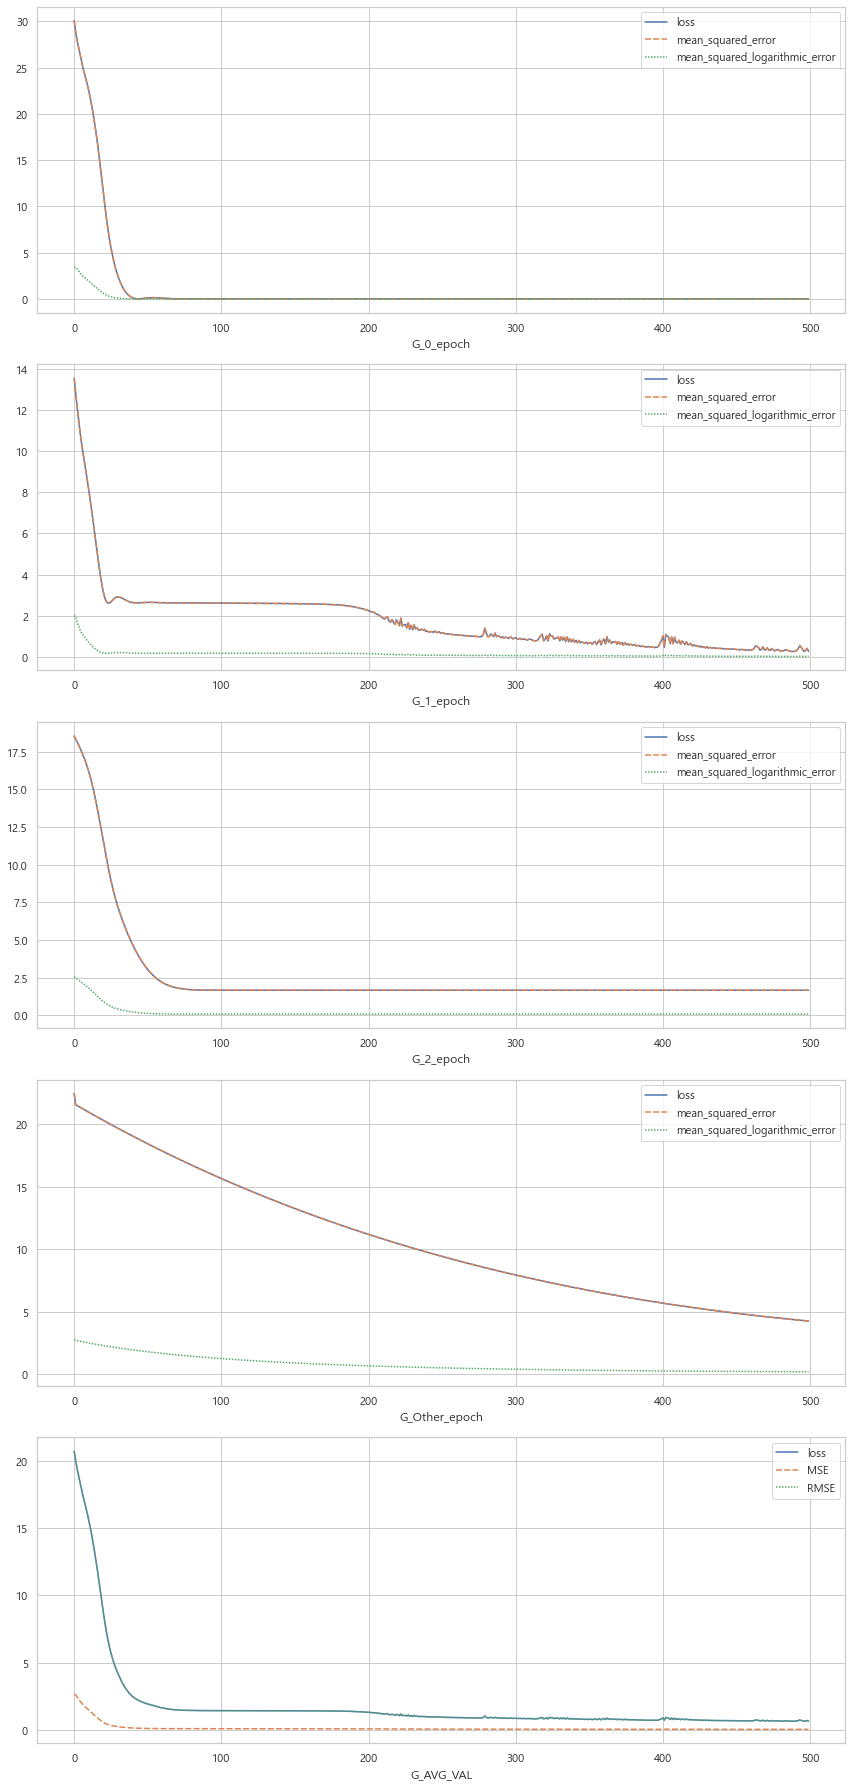

In [31]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

MSE = []
MAE = []
RMSE = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF[TDF.columns.difference(['epoch'])], legend=True)
    ax.set_xlabel('G_'+GNAME+'_epoch')
    if GN != len(models)-1:
        MAE.append(TDF['loss'].to_list())
        MSE.append(TDF['mean_squared_logarithmic_error'].to_list())
        RMSE.append(TDF['mean_squared_error'].to_list())
        
MSE = np.array(MSE)
MAE = np.array(MAE)
RMSE = np.array(RMSE)

BV = pd.DataFrame( data = {'loss': MAE.mean(axis=0), 'MSE': MSE.mean(axis=0), 'RMSE':RMSE.mean(axis=0)} )
BV.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_loss.csv', index=False)
ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_VAL')

fig.tight_layout()
plt.savefig(MODEL_PATH+'/Models_LOSS.png')
plt.show()

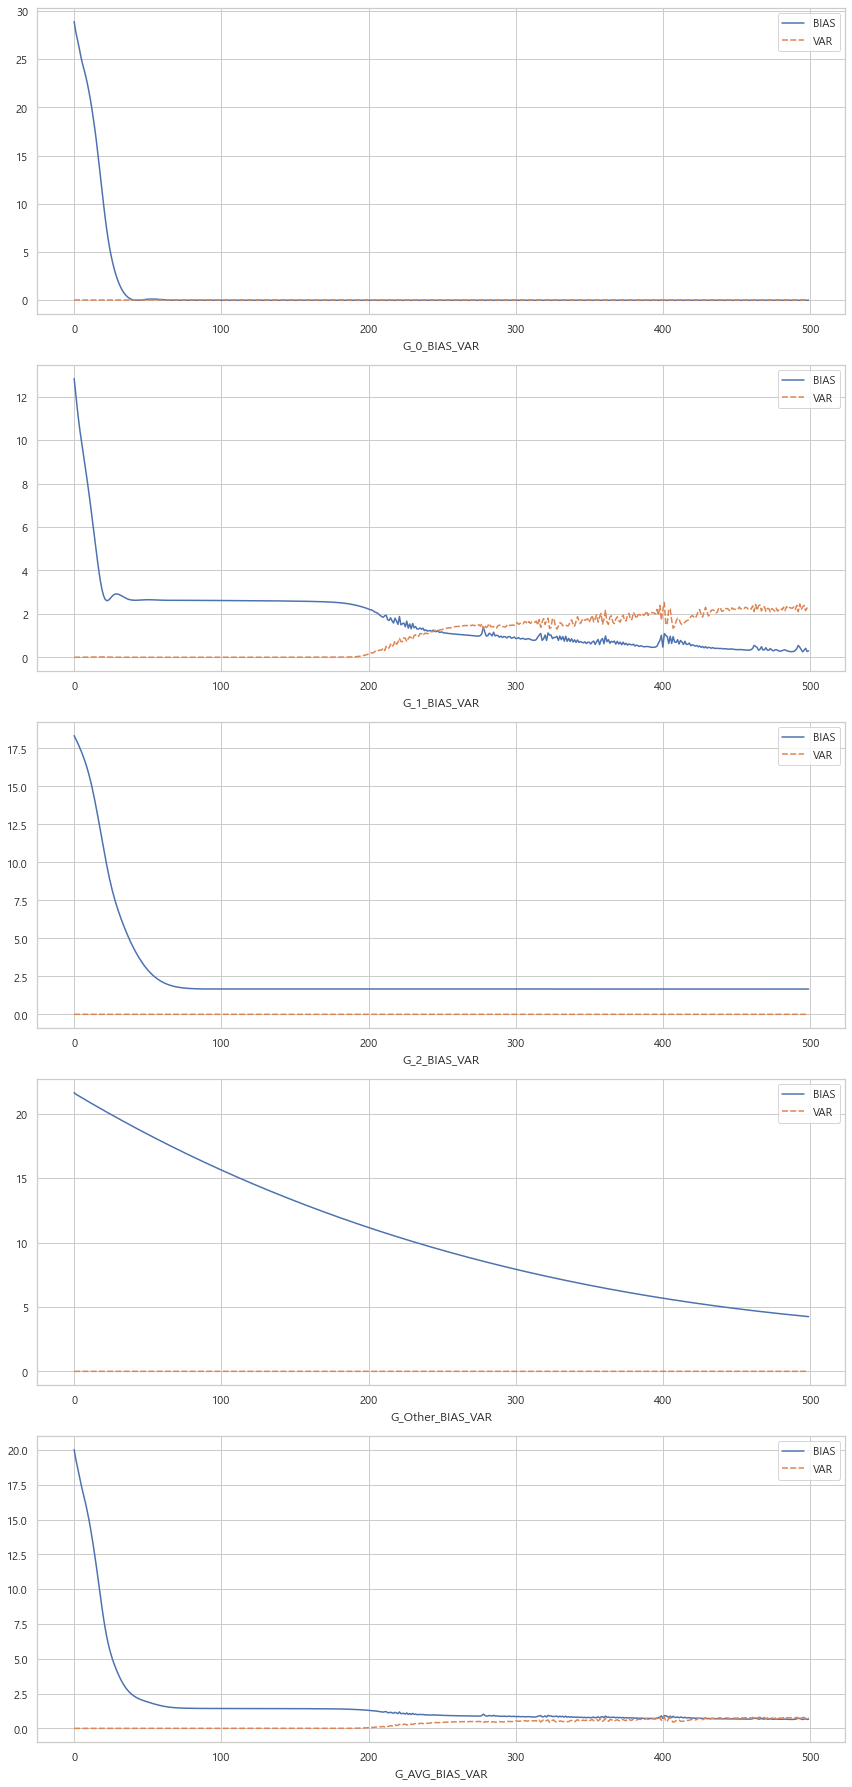

In [32]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

BIAS = []
VAR = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF, legend=True)
    if GN != len(models)-1:
        BIAS.append(TDF['BIAS'].to_list())
        VAR.append(TDF['VAR'].to_list())

    ax.set_xlabel('G_'+GNAME+'_BIAS_VAR')
BIAS = np.array(BIAS)
VAR = np.array(VAR)

BV = pd.DataFrame( data = {'BIAS': BIAS.mean(axis=0), 'VAR': VAR.mean(axis=0)} )

ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_BIAS_VAR')
BV.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_BIAS_VAR.csv', index=False)

fig.tight_layout()
plt.savefig(MODEL_PATH+'/Models_BIAS_VAR.png')
plt.show()
    

In [33]:
ENS_MODELS = []
for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    ENS_MODELS.append(tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5'))

#_path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_All'
#ALL_MODELS = tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_All.h5')
#MD = tf.keras.models.load_model(CLASSFICATION_PATH)

#class_yhat = MD.predict(enTest_X)

enTest_reg_X = enTest_X.reshape((enTest_X.shape[0],24,len(Features)))

ALL_Y_HAT = ALL_MODEL.predict(enTest_reg_X)

ENS_Y_HATS = []

for M in ENS_MODELS:
    ENS_Y_HATS.append(M.predict(enTest_reg_X))


#CLASS_X = np.reshape(CLASS_X,(1,72))
#CLASS_X.shape


print(len(ENS_Y_HATS))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
4


In [34]:
Weighted = np.zeros((enTest_reg_X.shape[0],(len(models)+1) if OTHER_FLAG else (len(models))), dtype=int)

for i in range(enTest_reg_X.shape[0]):
    for Key in FeaturesRange:
        for FILTERS in FeaturesRange[Key]:
            FT = FeaturesRange[Key][FILTERS][0]
            tempMEAN = enTest_reg_X[i].mean(axis=0)
            if tempMEAN[Features.index(FILTERS)]<=FT[0] and tempMEAN[Features.index(FILTERS)]>FT[1]:
                Weighted[i][int(Key)] = 1
    if sum(Weighted[i])==0:
        Weighted[i][-1]=1            
Weighted

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0,

(100,)
(100,)
(100,)


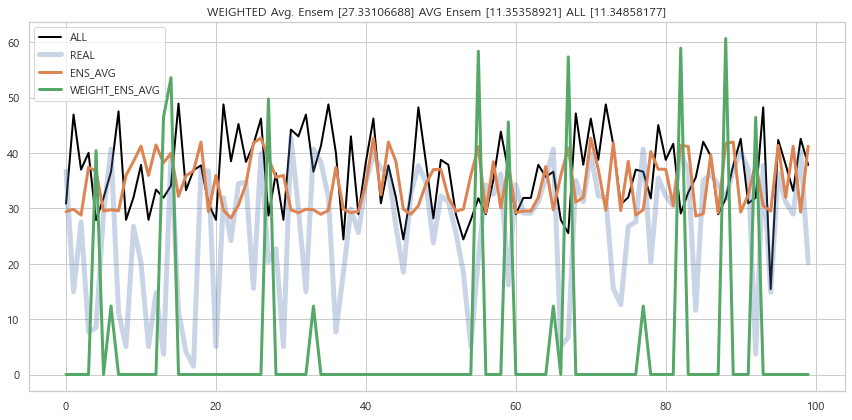

In [36]:
TEST_NUM = 50
WEIGHT_ENS_RESULT = []
ENS_RESULT = []
ALL_RESULT = list(Y_scaler.inverse_transform(np.array(ALL_Y_HAT).reshape(-1,1)).flatten())

ALL_RESULT = np.array(ALL_RESULT)
ALL_RESULT = ALL_RESULT.reshape((int(len(ENS_Y_HATS[0])),))



tmp_ENS_HATS = []
    
    
for i in range(len(ENS_Y_HATS)):
    tmp_ENS_HATS.append(list(Y_scaler.inverse_transform(np.array(ENS_Y_HATS[i]).reshape(-1,1)).flatten()))


for i in range(len(tmp_ENS_HATS[0])):
    tmpWER = 0
    for idx in range(len(tmp_ENS_HATS)):
        tmpWER+= tmp_ENS_HATS[idx][i]*Weighted[i][idx]
        ENS_RESULT.append(tmp_ENS_HATS[idx][i])
    
    WEIGHT_ENS_RESULT.append(tmpWER/(sum(Weighted[i])))

WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)

WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.reshape((int(len(ENS_Y_HATS[0])),))
#WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.sum(axis=1)/
print(WEIGHT_ENS_RESULT.shape)

ENS_RESULT = np.array(ENS_RESULT)
ENS_RESULT = ENS_RESULT.reshape((int(len(ENS_Y_HATS[0])),len(ENS_Y_HATS)))
ENS_RESULT = ENS_RESULT.mean(axis=1)
print(ENS_RESULT.shape)
print(ALL_RESULT.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(len(ENS_Y_HATS[0]))]
WER = []
ER = []
AR = []
for i in range(len(enTest_dis_y)):
    WER.append(abs(WEIGHT_ENS_RESULT[i]-enTest_dis_y[i]))
    ER.append(abs(ENS_RESULT[i]-enTest_dis_y[i]))
    AR.append(abs(ALL_RESULT[i]-enTest_dis_y[i]))

plt.title('WEIGHTED Avg. Ensem '+str(sum(WER)/len(WER))+' AVG Ensem '+str(sum(ER)/len(ER))+' ALL '+str(sum(AR)/len(AR)))

plt.plot(x, ALL_RESULT, label = "ALL", color="black", linewidth=2, alpha=1)

plt.plot(x, enTest_dis_y, label = "REAL" , linewidth=5, alpha=0.3)
plt.plot(x, ENS_RESULT, label = "ENS_AVG", linewidth=3, alpha=1)
plt.plot(x, WEIGHT_ENS_RESULT, label = "WEIGHT_ENS_AVG", linewidth=3, alpha=1)
plt.legend()

plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_Line_Chart.png')
plt.show()



In [37]:

#sum_1 = np.sum(shap_val,axis=1)
import json
with open(MODEL_PATH+'/'+MODEL_NAME+'_FEAT_RANGE.json', "w", encoding='utf8') as outfile: 
    json.dump(FeaturesRange, outfile, ensure_ascii=False)

tp = pd.DataFrame( data = {'Features': Features } )
tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_Features.csv')

tp = pd.DataFrame(data = {'TEST_idx': testlinC })
tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_TEST_idx.csv')




In [38]:





explainer_list = []
expected_value_list = []
shap_values_list = []

for i in range(len(ENS_MODELS)):
    GNAME = str(i)
    if i == len(ENS_MODELS)-1 and OTHER_FLAG:
        GNAME = 'Other'
    print(str(i)+' 모델 shap 계산중.')
    explainer = shap.DeepExplainer(ENS_MODELS[i], G_TRAIN_X[i])
    expected_value = explainer.expected_value[0]
    shap_values = explainer.shap_values(G_TRAIN_X[i])
    shap_val = shap_values[0].mean(axis=1)
    SH_NP = np.array(shap_val)
    tp = pd.DataFrame(SH_NP, columns=Features)
    tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_G_'+GNAME+'.csv')

    
    tp = pd.DataFrame( data = {'expected_value': [expected_value] } )
    tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_EXP'+GNAME+'.csv')
    
    explainer_list.append(explainer)
    expected_value_list.append(expected_value)
    shap_values_list.append(SH_NP)




0 모델 shap 계산중.

1 모델 shap 계산중.
2 모델 shap 계산중.
3 모델 shap 계산중.


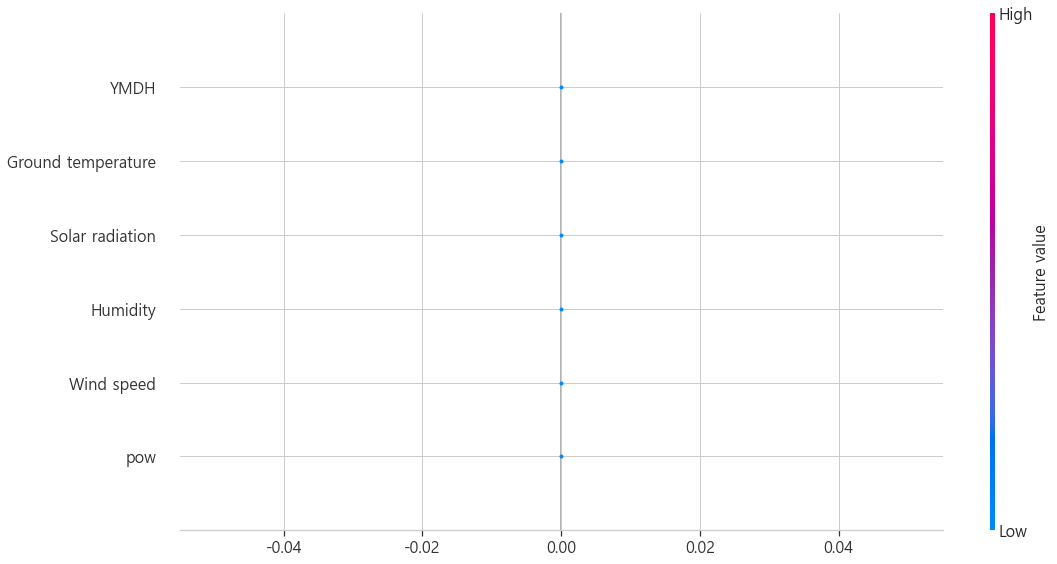

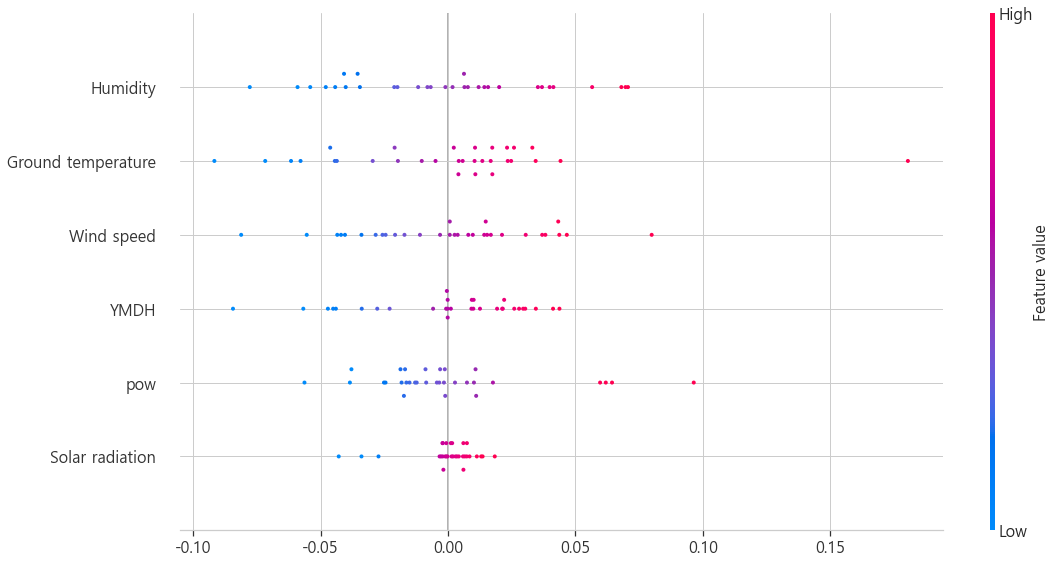

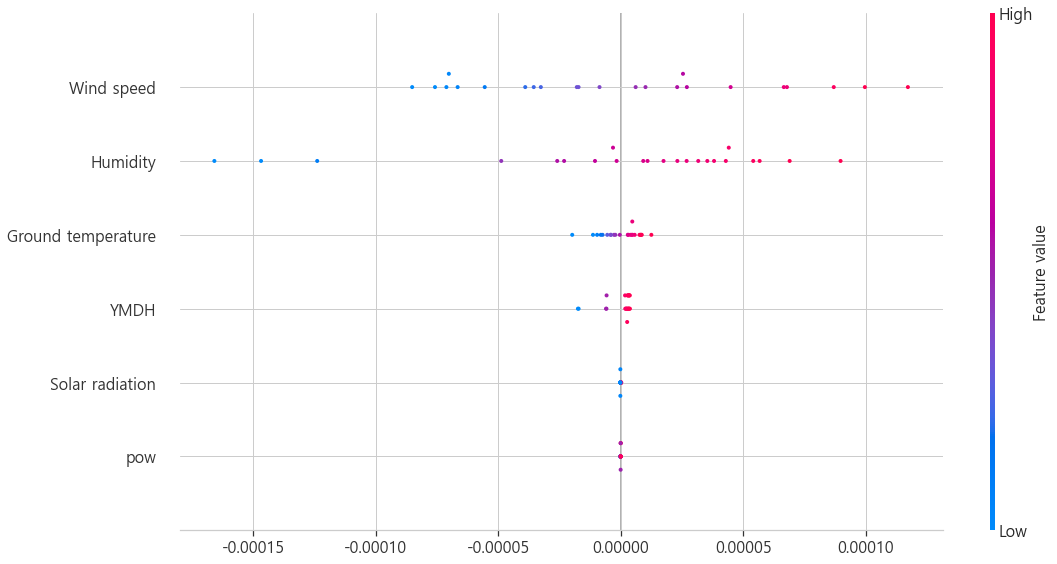

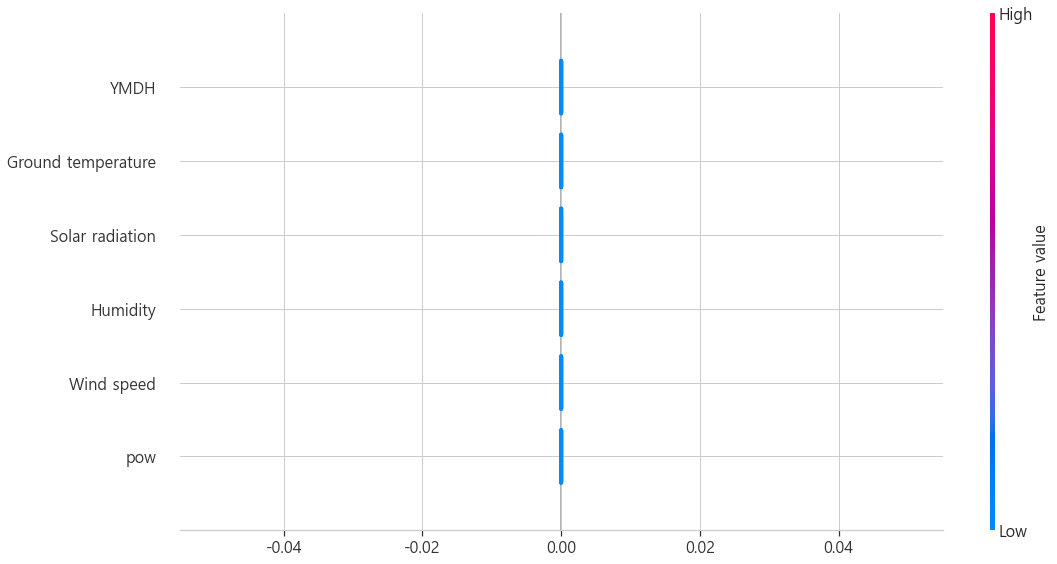

In [39]:
import matplotlib.pyplot as plt

for i in range(len(shap_values_list)):
    GNAME = str(i)
    if i == len(shap_values_list)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = MODEL_PATH+'/G_'+GNAME
    
    all_df = pd.DataFrame(shap_values_list[i], columns=Features)
    TEST_EXP = shap.Explanation(
        values = all_df.values, 
        base_values=expected_value_list[i],
        feature_names=Features,
        data = all_df.values)
    
    ax = plt.figure(figsize=(16,8))
    shap.plots.beeswarm(TEST_EXP,show=False,plot_size=(16,8))
        
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    axt = ax.get_axes()[-1]
    axt.set_ylabel(axt.get_ylabel(),fontsize=16)
    axt.tick_params(labelsize=16)
    
    
    plt.tight_layout()
    plt.savefig(_path+'/FeatureImportance.png',dpi=150)


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

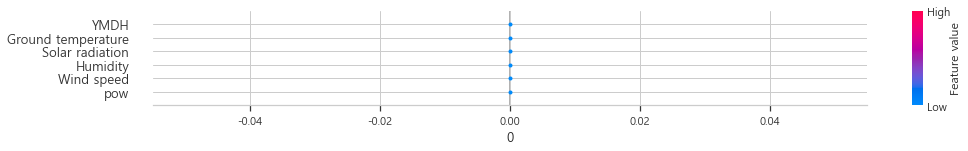

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,20*len(shap_values_list)))
gs = fig.add_gridspec( len(shap_values_list),1)

for i in range(len(shap_values_list)):
    all_df = pd.DataFrame(shap_values_list[i], columns=Features)
    TEST_EXP = shap.Explanation(
        values = all_df.values, 
        base_values=expected_value_list[i],
        feature_names=Features,
        data = all_df.values)
    
    ax = fig.add_subplot(gs[i, 0])
    shap.plots.beeswarm(TEST_EXP,show=False,plot_size=(16,8))
    ax.set_xlabel(str(i))
    ax.savefig(MODEL_PATH+'/Models_beeswarm.png')

plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_beeswarm.png')
plt.show()

shap_values_list

In [ ]:
shap.initjs()
#shap.force_plot(explainer.expected_value.mean(), SH_NP, Features)

In [ ]:


import matplotlib.pyplot as plt

for i in range(len(shap_values_list)):
    GNAME = str(i)
    if i == len(shap_values_list)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = MODEL_PATH+'/G_'+GNAME
    shap.save_html(_path+'/Models_cluster.html',shap.force_plot(expected_value_list[i], shap_values_list[i], Features,matplotlib=False),full_html=False)
    
    

In [ ]:
shap.force_plot(expected_value_list[0], shap_values_list[0][:100], Features,matplotlib=False)

In [ ]:
'''
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8*len(shap_values_list)))
gs = fig.add_gridspec(len(shap_values_list), 1)

for i in range(len(shap_values_list)):
    all_df = pd.DataFrame(shap_values_list[i], columns=Features).values
    ax = fig.add_subplot(gs[i, 0])
    #all_df = all_df.reshape((24,int(all_df.shape[0]/24/24),24,len(Features)))

    #all_df= all_df.reshape((all_df.shape[0]*all_df.shape[1],all_df.shape[2]))
    shap.decision_plot(expected_value_list[i], all_df, all_df, feature_names=Features, ignore_warnings=True,auto_size_plot=False,show=False,alpha=0.1)
    ax.set_xlabel(str(i))

plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_decision.png')
plt.show()

'''
import matplotlib.pyplot as plt

for i in range(len(shap_values_list)):
    GNAME = str(i)
    if i == len(shap_values_list)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = MODEL_PATH+'/G_'+GNAME
    
    all_df = pd.DataFrame(shap_values_list[i], columns=Features).values
    
    ax = plt.figure(figsize=(16,8))
    shap.decision_plot(expected_value_list[i], all_df, all_df, feature_names=Features, ignore_warnings=True,auto_size_plot=False,show=False,alpha=0.1)
        
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    axt = ax.get_axes()[-1]
    axt.set_ylabel(axt.get_ylabel(),fontsize=16)
    axt.tick_params(labelsize=16)
    
    
    plt.tight_layout()
    plt.savefig(_path+'/Models_decision.png',dpi=150)


In [ ]:
COLORS = ['#5567ED', '#ED6D73', '#CE6EEB', '#EDC43E', '#4AED72']
reversed(COLORS)
def renderICE(_Model,_X_DATA,check_col, C_list, ax):
    for _M in range(len(_Model)):
        ICE_d = pd.DataFrame(np.empty((_X_DATA[_M].shape[0], len(C_list))), columns = C_list)
        C_train = pd.DataFrame(_X_DATA[_M].reshape((_X_DATA[_M].shape[0]*24,len(Features))),columns=Features).copy()
        for C in C_list:
            C_train[Features[check_col]] = C
            values = C_train.values
            values = values.reshape((int(C_train.shape[0]/24),24,len(Features)))
        
            y_hat = _Model[_M].predict(values)
            #y_hat = y_hat.mean(axis=1)
            
            y_hat = y_hat.flatten()
        
            ICE_d[C] = list(y_hat)
            
        for i in range(_X_DATA[_M].shape[0]):
        #for i in range(_X_DATA[_M].shape[0]):
            ax.plot(ICE_d.T.index, ICE_d.T[i], color = COLORS[_M], linewidth = 0.2 , alpha=0.3)
        ND = np.array(ICE_d)
    
        ND = np.average(ND,axis=0)
        ax.plot(ICE_d.T.index, ND, color = 'black', linewidth = 3.0)
        ax.plot(ICE_d.T.index, ND, color = COLORS[_M], linewidth = 2.0)
        print(ICE_d.size)
        ICE_d.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_'+str(_M)+'_ICE_'+str(check_col)+'.csv')

    print('ICE값 저장')
    ax.set_title(Features[check_col])

In [ ]:
import json
fig = plt.figure(figsize=(5*len(Features), 10))
C_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#C_list = [0,1.0]
for i in range(len(Features)):
    renderICE(ENS_MODELS,G_TRAIN_X, i, C_list, fig.add_subplot(1, len(Features), i+1))
plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_ICE.png')
plt.show()

In [ ]:
COLORS = ['#5567ED', '#ED6D73', '#CE6EEB', '#EDC43E', '#4AED72']
reversed(COLORS)
def renderICE_DE(_Model,_X_DATA,check_col, C_list, ax):
    ICE_d = pd.DataFrame(np.empty((_X_DATA.shape[0], len(C_list))), columns = C_list)
    
    for C in C_list:
        C_train = pd.DataFrame(_X_DATA.reshape((_X_DATA.shape[0]*24,len(Features))),columns=Features).copy()
        WEIGHT_ENS_RESULT = []
        ENS_Y_HATS = []
        for _M in range(len(_Model)):
            C_train[Features[check_col]] = C
            values = C_train.values
            values = values.reshape((int(C_train.shape[0]/24),24,len(Features)))
        
            y_hat = _Model[_M].predict(values)
            #y_hat = y_hat.mean(axis=1)
        
            y_hat = y_hat.flatten()
            ENS_Y_HATS.append(y_hat)
            
        for idx in range(len(ENS_Y_HATS[0])):
            tmpWER = 0
            for i in range(len(ENS_Y_HATS)):
                tmpWER+=((ENS_Y_HATS[i][idx])*Weighted[idx][i])
            WEIGHT_ENS_RESULT.append(tmpWER/(sum(Weighted[idx])))
        WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)
        
        ICE_d[C] = list(WEIGHT_ENS_RESULT)
            
    for i in range(_X_DATA.shape[0]):
        #for i in range(_X_DATA[_M].shape[0]):
            ax.plot(ICE_d.T.index, ICE_d.T[i], color = COLORS[0], linewidth = 0.2 , alpha=0.3)
            
    ND = np.array(ICE_d)
    ND = np.average(ND,axis=0)
    ax.plot(ICE_d.T.index, ND, color = 'black', linewidth = 3.0)
    ax.plot(ICE_d.T.index, ND, color = COLORS[0], linewidth = 2.0)
    print(ICE_d.size)
        #ICE_d.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_'+str(_M)+'_ICE_'+str(check_col)+'.csv')

    #print('ICE값 저장')
    ax.set_title(Features[check_col])

In [ ]:
Weighted = np.zeros((ALL_TRAIN_X.shape[0],(len(models)+1) if OTHER_FLAG else (len(models))), dtype=int)
for i in range(ALL_TRAIN_X.shape[0]):
    for Key in FeaturesRange:
        for FILTERS in FeaturesRange[Key]:
            FT = FeaturesRange[Key][FILTERS][0]
            tempMEAN = ALL_TRAIN_X[i].mean(axis=0)
            if tempMEAN[Features.index(FILTERS)]<=FT[0] and tempMEAN[Features.index(FILTERS)]>FT[1]:
                Weighted[i][int(Key)] = 1
    if sum(Weighted[i])==0:
        Weighted[i][-1]=1            
Weighted

In [ ]:
import json
fig = plt.figure(figsize=(5*len(Features), 10))
C_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#C_list = [0,1.0]
for i in range(len(Features)):
    renderICE_DE(ENS_MODELS,ALL_TRAIN_X, i, C_list, fig.add_subplot(1, len(Features), i+1))
    
plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_DE_ICE.png')
plt.show()